# melakukan prediksi harga mobil bekas dan mba


In [22]:
pip install sastrawi

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# Melakukan pengambilan data
data = pd.read_csv('Data/toyota.csv')

In [25]:
data.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [26]:
data["year"].unique()

array([2016, 2017, 2015, 2020, 2013, 2019, 2018, 2014, 2012, 2005, 2003,
       2004, 2001, 2008, 2007, 2010, 2011, 2006, 2009, 2002, 1999, 2000,
       1998])

In [27]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


<Axes: >

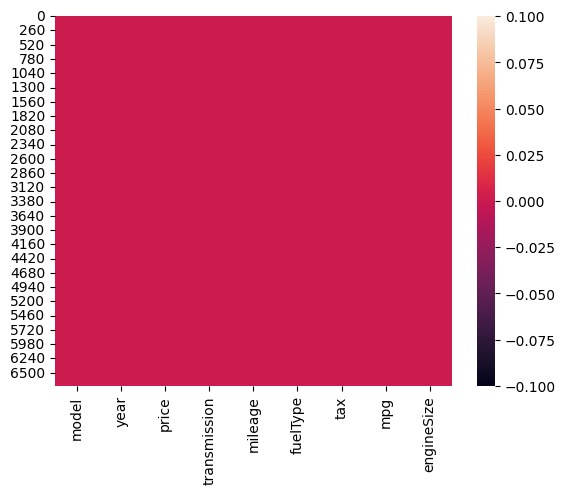

In [28]:
sns.heatmap(data.isnull())


In [29]:
# melihat deskripsi data
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


### Visualisasi Data


<Axes: >

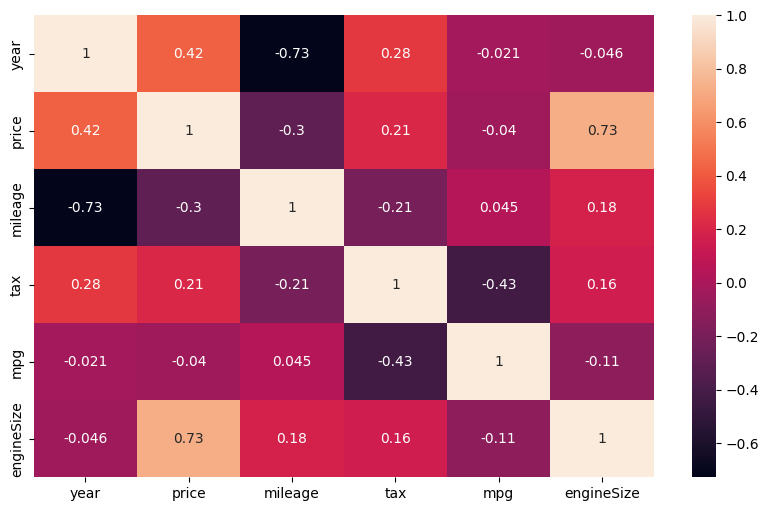

In [30]:
df =data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)


In [31]:

# jumlah mobil berdasarkan model
models= data.groupby('model').count()[['tax']].sort_values('tax', ascending=True).reset_index()
models=models.rename(columns={'tax':'numberOfCars'})


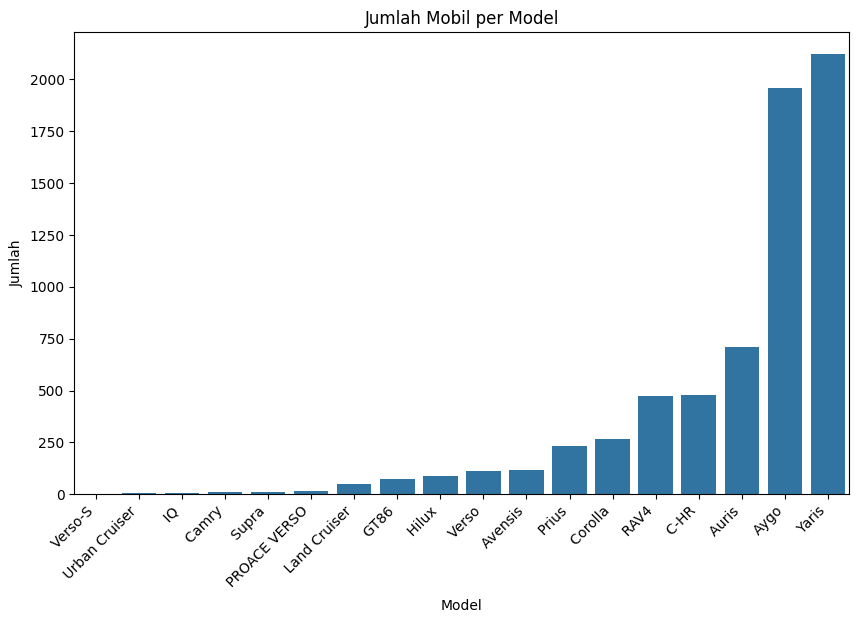

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models['model'], y=models['numberOfCars'])
plt.xticks(rotation=45, ha='right')
plt.title('Jumlah Mobil per Model')
plt.xlabel('Model')
plt.ylabel('Jumlah')
plt.show()

In [33]:
# jumlah mobil berdasarkan engine size
mesin=df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
mesin=mesin.rename(columns={'tax':'count'})


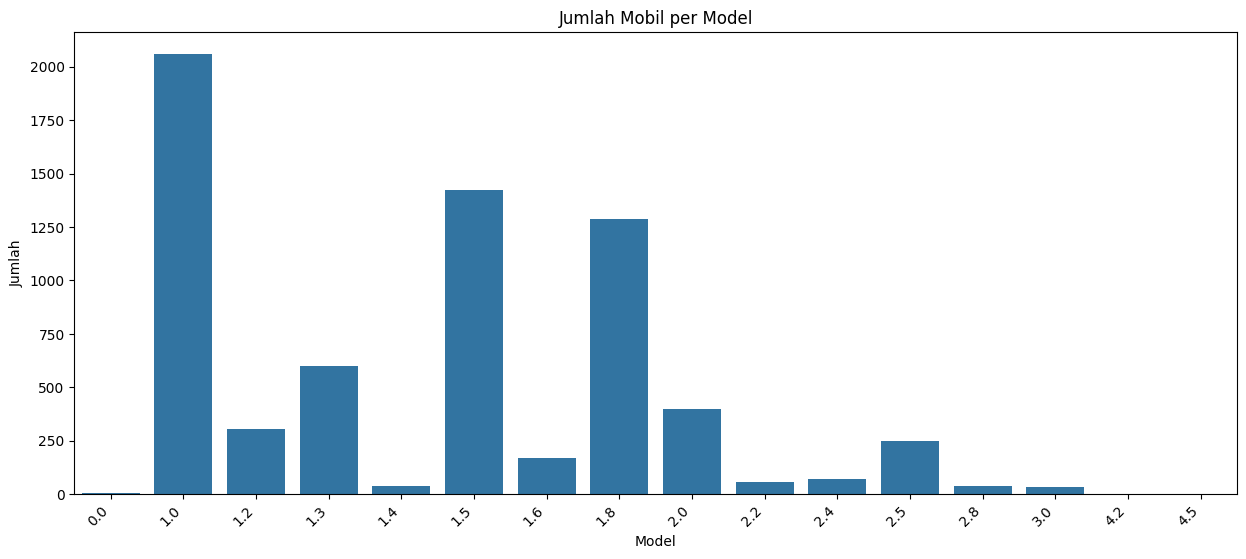

In [34]:

plt.figure(figsize=(15, 6))
sns.barplot(x=mesin['engineSize'], y=mesin['count'])
plt.xticks(rotation=45, ha='right')
plt.title('Jumlah Mobil per Model')
plt.xlabel('Model')
plt.ylabel('Jumlah')
plt.show()

<Figure size 1500x600 with 0 Axes>

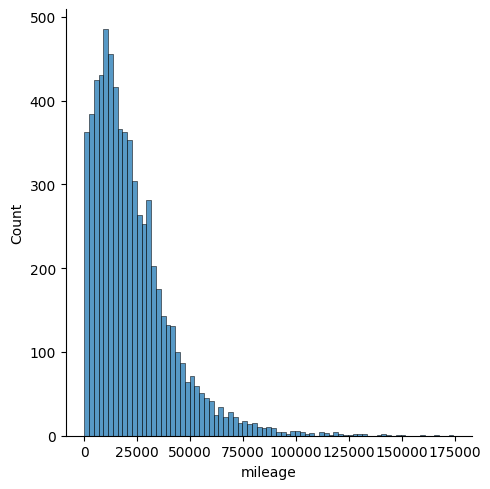

In [35]:
#jumlah mobil berdasarkan mileage
plt.figure(figsize=(15, 6))
sns.displot(df['mileage'])


<Figure size 1500x600 with 0 Axes>

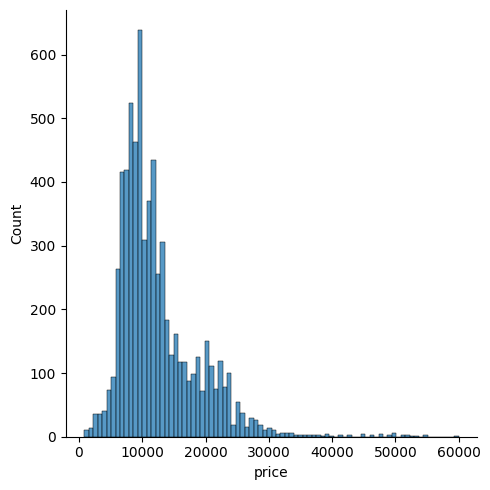

In [36]:
# jumlah mobil berdasarkan price
plt.figure(figsize=(15, 6))
sns.displot(df['price'])

## Training Model


In [37]:
x=df.drop(columns=['price'])
y=df['price']
x.shape, y.shape


((6738, 5), (6738,))

In [38]:
# split data training dan testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=75)
x_test.shape

(1685, 5)

In [39]:
# model regresi linier
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

# membuat prediksi
y_pred = model.predict(x_test)


In [40]:
acc = model.score(x_test, y_test)
print('Akurasi model regresi linier :', acc)


Akurasi model regresi linier : 0.7691358267204206


### testing model


In [41]:
### Testing model
new_data = np.array([[2019, 5000, 145, 30.2, 2]])
new_pred = model.predict(new_data)
print('Prediksi harga mobil bekas :', new_pred)

Prediksi harga mobil bekas : [21176.30691607]


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Menyimpan model





In [43]:
import pickle

pickle.dump(model, open('Util/estimasi_mobil_toyota.sav', 'wb'))





